In [1]:
# Installing packages

In [2]:
# !pip install spacy
# !python -m spacy download en_core_web_sm
# !pip install beautifulsoup4
# !pip install textblob
# !pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall
# !pip install wordcloud
# !pip install tqdm

In [3]:
# Importing Packages

In [4]:
import warnings
import pandas as pd
import preprocess_kgptalkie as ps
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import pickle
import os

In [5]:
text = "I am https://google.com"
text = ps.remove_urls(text)
text

'I am '

In [6]:
# Adding the dataset into the csv

In [7]:
# url = 'https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/twitter_sentiment.csv'
# data_df = pd.read_csv(url , header=None)
# data_df.to_csv('tweets.csv', mode='a', index=False, header=not os.path.isfile('tweets.csv'))
# data_df

In [8]:
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('tweets.csv' , header=None)
df

,0,1,2,3
0,Steven Cohen,"Apr 9, 2024 · 3:29 PM UTC",Positive,It should be a great day at the ballpark on Su...
1,Chris Christie,"Apr 7, 2024 · 9:10 PM UTC",Positive,Way to go .@RegueroKatia The only way to respo...
2,Chris Christie,"Apr 5, 2024 · 2:30 PM UTC",Negative,A few moments ago our entire house shook for a...
3,Chris Christie,"Mar 28, 2024 · 2:01 AM UTC",Neutral,“I appreciate the encouragement I’ve gotten to...
4,Chris Christie,"Mar 28, 2024 · 2:00 AM UTC",Positive,I am sad to lose him as a friend and as an exa...
...,...,...,...,...
8449,Feedback,"May 14, 2024 · 01:58 PM UTC",Neutral,You are not that good
8450,Feedback,"May 14, 2024 · 03:39 PM UTC",Negative,I am not good
8451,Feedback,"May 14, 2024 · 07:10 PM UTC",Negative,You are not that good
8452,Feedback,"May 14, 2024 · 09:39 PM UTC",Negative,You are not a good boy


In [10]:
df = df[[2,3]].reset_index(drop = True)
df

,2,3
0,Positive,It should be a great day at the ballpark on Su...
1,Positive,Way to go .@RegueroKatia The only way to respo...
2,Negative,A few moments ago our entire house shook for a...
3,Neutral,“I appreciate the encouragement I’ve gotten to...
4,Positive,I am sad to lose him as a friend and as an exa...
...,...,...
8449,Neutral,You are not that good
8450,Negative,I am not good
8451,Negative,You are not that good
8452,Negative,You are not a good boy


In [11]:
df.columns = ['sentiment', 'text']
df

,sentiment,text
0,Positive,It should be a great day at the ballpark on Su...
1,Positive,Way to go .@RegueroKatia The only way to respo...
2,Negative,A few moments ago our entire house shook for a...
3,Neutral,“I appreciate the encouragement I’ve gotten to...
4,Positive,I am sad to lose him as a friend and as an exa...
...,...,...
8449,Neutral,You are not that good
8450,Negative,I am not good
8451,Negative,You are not that good
8452,Negative,You are not a good boy


In [12]:
df.isnull().sum()
print(df.shape)


(8454, 2)


In [13]:
df.dropna(inplace=True)
df = df[df['text'].apply(len)>5]
print(df.shape)


(8448, 2)


In [14]:
df.sentiment.value_counts()

sentiment
Neutral       3539
Positive      2868
Negative      1958
Irrelevant      83
Name: count, dtype: int64

In [15]:
df = ps.get_basic_features(df)
df.columns

Index(['sentiment', 'text', 'char_counts', 'word_counts', 'avg_wordlength',
       'stopwords_counts', 'hashtag_counts', 'mentions_counts',
       'digits_counts', 'uppercase_counts'],
      dtype='object')

In [16]:
df.head(3)

,sentiment,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,Positive,It should be a great day at the ballpark on Su...,111,28,3.964286,14,1,0,3,0
1,Positive,Way to go .@RegueroKatia The only way to respo...,221,45,4.911111,21,0,0,5,0
2,Negative,A few moments ago our entire house shook for a...,97,24,4.041667,12,0,0,3,2


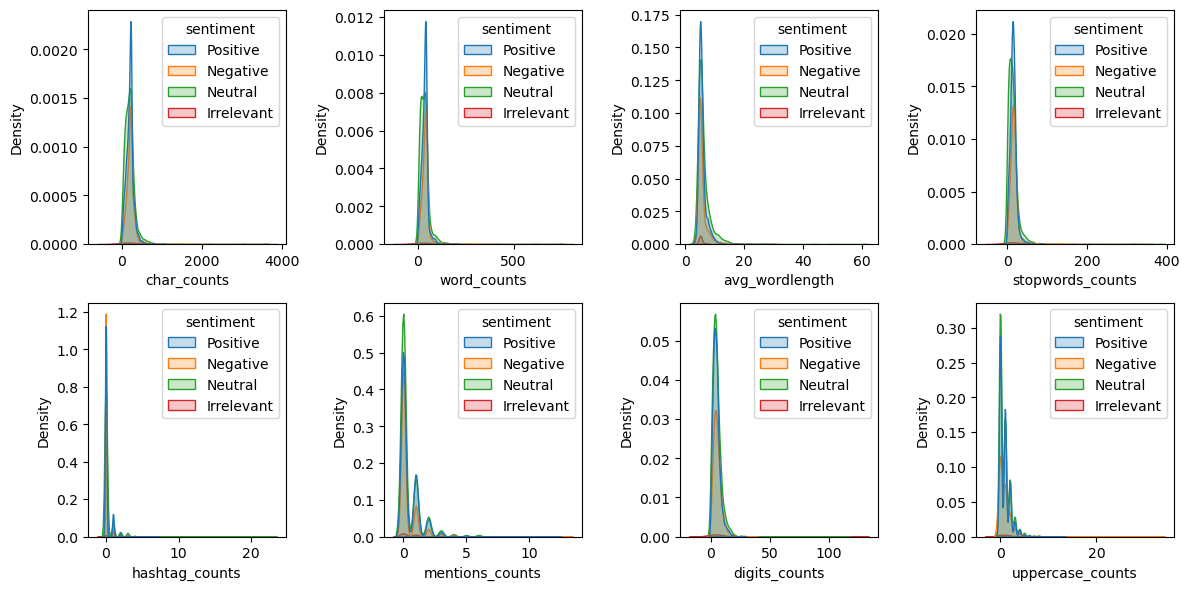

In [17]:
plt.figure(figsize = (12,6))
num_cols = df.select_dtypes(include='number').columns

for index,col in enumerate(num_cols):
    plt.subplot(2,4, index+1)
    sns.kdeplot(data=df, x=col, hue="sentiment", fill=True)
    
plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

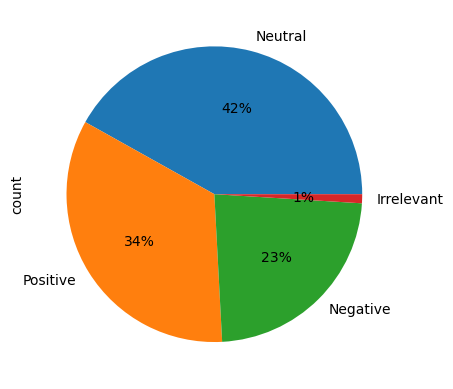

In [18]:
df['sentiment'].value_counts().plot(kind='pie', autopct="%1.0f%%")

In [19]:
# wordcloud visualization
stopwords = list(STOPWORDS)
stopwords

['under',
 'up',
 'am',
 'themselves',
 'because',
 'with',
 'he',
 'and',
 'such',
 'should',
 'therefore',
 'hence',
 "here's",
 'com',
 "didn't",
 'few',
 'too',
 "what's",
 'be',
 'for',
 'doing',
 'have',
 'not',
 'what',
 'until',
 "he'll",
 'www',
 'an',
 "haven't",
 "mustn't",
 'where',
 'who',
 "doesn't",
 'having',
 'however',
 'both',
 "we'll",
 "how's",
 'each',
 'yourselves',
 'me',
 'than',
 'do',
 'below',
 "shouldn't",
 'down',
 'been',
 'over',
 "i've",
 'when',
 'just',
 "shan't",
 'more',
 'which',
 'we',
 "won't",
 'other',
 'about',
 'once',
 'but',
 'this',
 'out',
 'through',
 'yourself',
 'him',
 'at',
 'they',
 'only',
 'herself',
 'above',
 'does',
 'hers',
 'on',
 'further',
 'whom',
 'then',
 'it',
 'was',
 "hadn't",
 'ourselves',
 'himself',
 "she'd",
 "wasn't",
 'has',
 'ever',
 'ours',
 "she'll",
 'against',
 "they'd",
 'very',
 "we've",
 'why',
 'would',
 'all',
 "we'd",
 'r',
 'between',
 'if',
 "wouldn't",
 "they're",
 'these',
 'most',
 'can',
 "weren

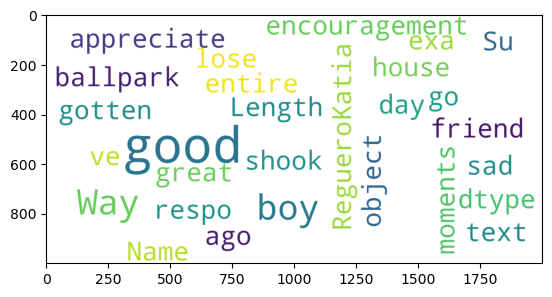

In [20]:
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=300, max_font_size=40, scale=5).generate(str(df['text']))
plt.imshow(wordcloud)


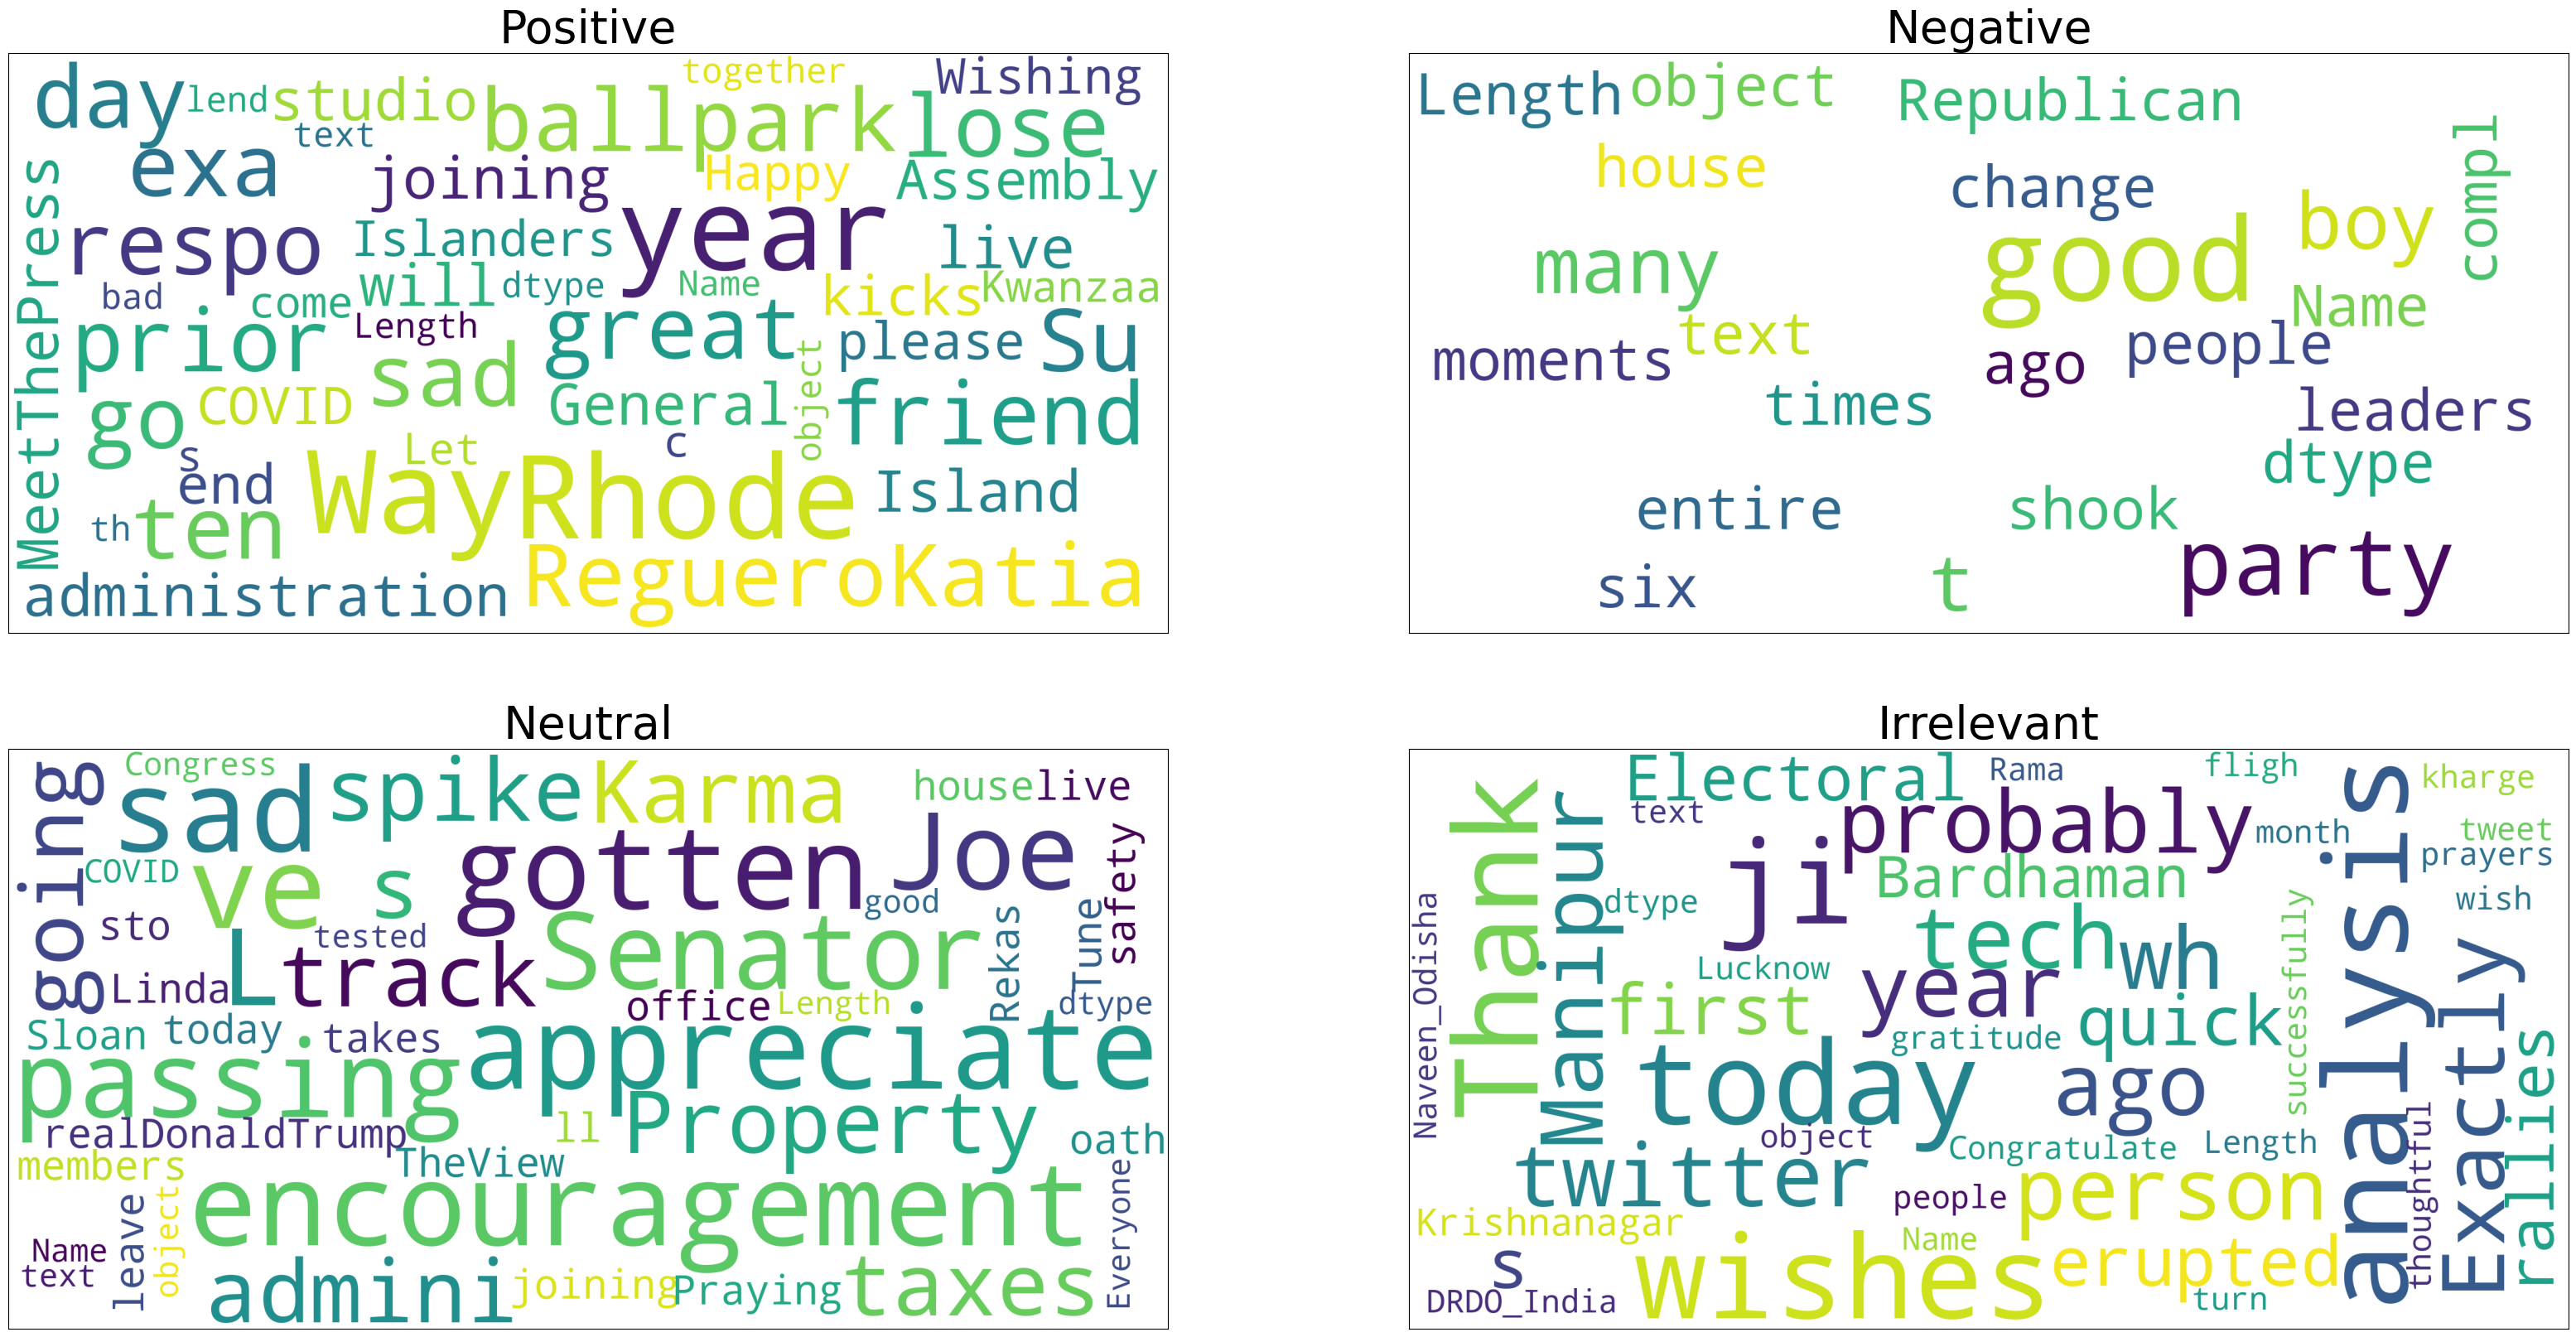

In [21]:
plt.figure(figsize=(40,20))
for index, sent in enumerate(df['sentiment'].unique()):
    plt.subplot(2,2,index+1)
    df1 = df[df['sentiment'] == sent]['text']
    wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=300, max_font_size=40, scale=5).generate(str(df1))
    plt.imshow(wordcloud)
    plt.xticks([])    
    plt.yticks([])
    plt.title(sent, fontsize = 40)

In [22]:
# data cleaning

In [23]:
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply(lambda x: ps.remove_urls(x))
df['text'] = df['text'].apply(lambda x: ps.remove_html_tags(x))
df['text'] = df['text'].apply(lambda x: ps.remove_special_chars(x))
df['text'] = df['text'].apply(lambda x: ps.remove_rt(x))

In [24]:
# train test split

In [25]:

x_train, x_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=0)

In [26]:
x_train.shape, x_test.shape

((6758,), (1690,))

In [27]:
# model building and testing

In [28]:

clf = Pipeline([('tfid', TfidfVectorizer(stop_words=stopwords)),
                ('rfc', RandomForestClassifier(n_jobs=1))])
clf.fit(x_train, y_train)

# from randomforest import RandomForest
# clf = Pipeline([('tfid', TfidfVectorizer(stop_words=stopwords)),
#                 ('rfc',RandomForest(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1))])
# clf.fit(x_train, y_train)

Pipeline(steps=[('tfid',
                 TfidfVectorizer(stop_words=['under', 'up', 'am', 'themselves',
                                             'because', 'with', 'he', 'and',
                                             'such', 'should', 'therefore',
                                             'hence', "here's", 'com', "didn't",
                                             'few', 'too', "what's", 'be',
                                             'for', 'doing', 'have', 'not',
                                             'what', 'until', "he'll", 'www',
                                             'an', "haven't", "mustn't", ...])),
                ('rfc', RandomForestClassifier(n_jobs=1))])

In [29]:
# evaluation 

In [30]:
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.75      0.38      0.50        16
    Negative       0.72      0.58      0.64       392
     Neutral       0.68      0.68      0.68       713
    Positive       0.71      0.81      0.76       569

    accuracy                           0.70      1690
   macro avg       0.71      0.61      0.64      1690
weighted avg       0.70      0.70      0.70      1690



In [31]:
# save this model


In [32]:
pickle.dump(clf, open('twitter_sentiment.pkl', 'wb'))

In [33]:
clf.predict(['you are not that good'])

array(['Negative'], dtype=object)